<a href="https://colab.research.google.com/github/SriramyaK/Deep_learning_explorations/blob/master/Happy_Baby_vs_Crying_Baby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.vision.data import *
from fastai.widgets import ImageDownloader,download_google_images

In [0]:
folder = 'Crying Babies'
file = 'Crying Babies.csv'

In [0]:
folder = 'Happy Babies'
file = 'Happy Babies.csv'

In [0]:
path = Path(base_dir + 'data/Babies')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [7]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/Happy Babies.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/Crying Babies.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/valid')]

In [0]:
classes = ['Happy Babies', 'Crying Babies']

In [197]:
path, dest

(PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/valid'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/valid/Happy Babies'))

In [0]:
classes = ['Crying Babies','Happy Babies']

In [196]:
download_images(path/file, dest, max_pics=200)

In [201]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/.ipynb_checkpoints'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/Happy Babies.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/Crying Babies.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Babies/valid')]

In [0]:
data = ImageDataBunch.from_folder(path,valid_pct=0.05, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [9]:
data.classes

['Crying Babies', 'Happy Babies']

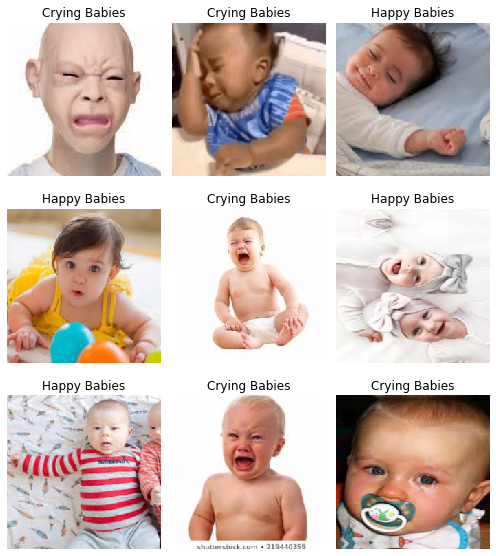

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [22]:
learn.fit_one_cycle(1)
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-5,3e-4), pct_start=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.303792,1.030500,0.806452,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.208627,0.716584,0.870968,00:08


In [0]:
saved_model_path = learn.save('Babies', return_path = True)
learn.export()

In [0]:
saved_model_pkl = str(learn.path) + '/export.pkl'

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

In [26]:
interp.most_confused(min_val=2)

[('Happy Babies', 'Crying Babies', 3)]

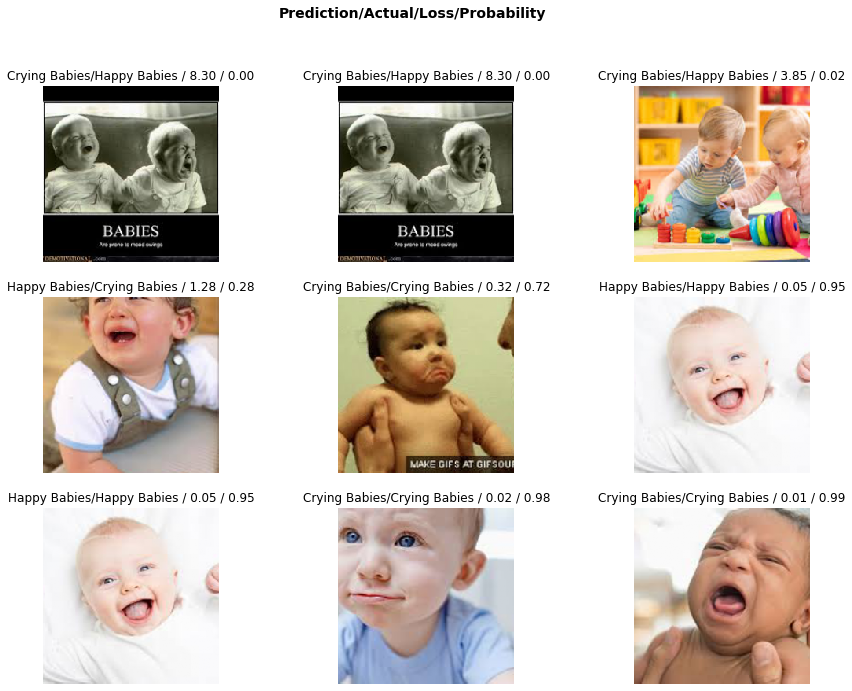

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

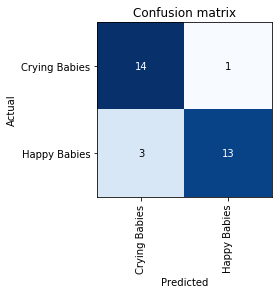

In [29]:
interp.plot_confusion_matrix()


In [30]:
!wget -O baby.jpg 'https://www.todaysparent.com/wp-content/uploads/2013/03/crying-baby-istock660.jpg'

--2020-03-13 23:54:01--  https://www.todaysparent.com/wp-content/uploads/2013/03/crying-baby-istock660.jpg
Resolving www.todaysparent.com (www.todaysparent.com)... 54.192.87.92, 54.192.87.40, 54.192.87.102, ...
Connecting to www.todaysparent.com (www.todaysparent.com)|54.192.87.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47655 (47K) [image/jpeg]
Saving to: ‘baby.jpg’

baby.jpg            100%[===================>]  46.54K  --.-KB/s    in 0.004s  

2020-03-13 23:54:01 (11.6 MB/s) - ‘baby.jpg’ saved [47655/47655]



In [0]:
learn_inference = load_learner(path)

In [34]:
img = open_image(os.path.join(os.getcwd(),"baby.jpg"))
learn_inference.predict(img)

(Category Crying Babies, tensor(0), tensor([0.9819, 0.0181]))